In [1]:
import sys
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import numpy as np
import SimpleITK as sitk
import radiomics as rad
import six
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append(os.path.abspath('src/'))
from data.lungdataset import LungData
#from utils import extract_firstlevel_features

In [3]:
rootdir = "/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A"
ld = LungData(rootdir)
medical_df = ld.raw_ehd
image_df = ld.as_dataframe()
#ld.as_dataframe()

In [4]:
print(medical_df.shape, " -- ", image_df.shape)

(1279, 130)  --  (4728, 8)


### Show images

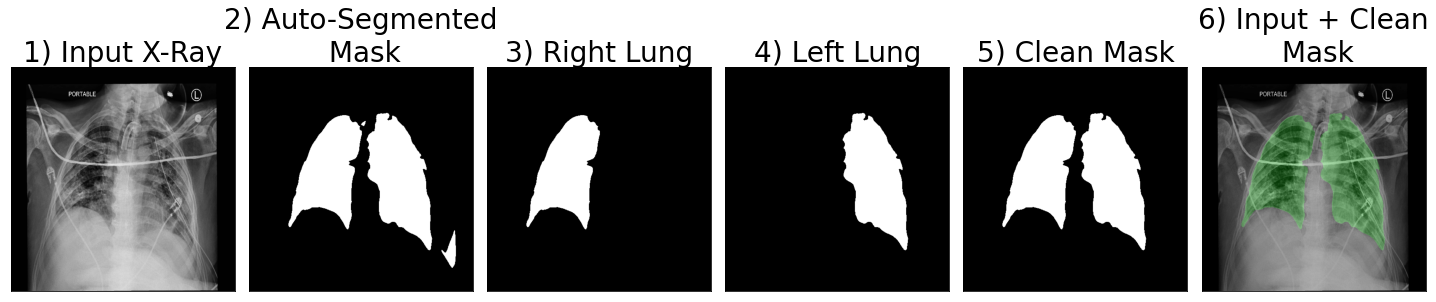

In [5]:
_id = 0


img = imread(image_df.png[_id])
img = Image.fromarray(img).convert("P")
img = torchvision.transforms.functional.resize(img, (512, 512))
mask = imread(image_df.png[_id].split(".png")[0]+"_mask.png")
mask_l = imread(image_df.mask_l[_id], as_gray=True)
mask_r = imread(image_df.mask_r[_id], as_gray=True)
mask_cleaned = imread(image_df.mask_cleaned[_id], as_gray=True)
mask_blend = (np.stack(( np.zeros((512,512)), mask_cleaned, np.zeros((512,512)) ), axis=2) * 255).astype(np.uint8).reshape(512,512,3)

fig, ax = plt.subplots(1,6, figsize=(20,6), sharex=True, sharey=True)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(mask, cmap="gray")
ax[2].imshow(mask_r, cmap="gray")
ax[3].imshow(mask_l, cmap="gray")
ax[4].imshow(mask_cleaned, cmap="gray")
ax[5].imshow(Image.blend(img.convert("RGB"), Image.fromarray(mask_blend), 0.2))

titles = ["Input X-Ray", "Auto-Segmented\n Mask", "Right Lung", "Left Lung", "Clean Mask", "Input + Clean\n Mask"]

for i, title in enumerate(titles):
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    ax[i].set_title(f"{i+1}) {title}", size=28)

fig.tight_layout()
#fig.savefig("../thesis/figures/impl/input_mask_full_example.png")

### Radiomics FE

In [6]:
settings = {'binWidth': 25,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}

## works with example mask
#feats = rad.firstorder.RadiomicsFirstOrder(ray,
#                                        sitk.GetImageFromArray(np.transpose(npm, axes=[1,2,0])[:,:,32]),
#                                        **settings)

xray = imread(image_df.png[0], as_gray=True)
xray = Image.fromarray(xray).convert("P")
xray = torchvision.transforms.functional.resize(xray, (512, 512))
mask_l = imread(image_df.mask_l[0], as_gray=True)

ray = sitk.GetImageFromArray(xray) 
#roi = sitk.GetImageFromArray(mask[:,:,1]/255)
roi = sitk.GetImageFromArray(mask_l)

print(image_df.png[0], "-- Mask left:")
feats = rad.firstorder.RadiomicsFirstOrder(ray, roi, **settings)
res = feats.execute()
for (key, val) in six.iteritems(res):
  print('  ', key, ':', val)


print(list(six.iterkeys(res)))

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A860070/03-16-1901-NA-CHEST AP PORT-91341/1.000000-AP-89694/1-1.png -- Mask left:
   10Percentile : 71.0
   90Percentile : 150.0
   Energy : 394369086.0
   Entropy : 2.394008250629026
   InterquartileRange : 41.0
   Kurtosis : 3.095117474797296
   Maximum : 218.0
   MeanAbsoluteDeviation : 24.855770966330386
   Mean : 113.58102349170571
   Median : 116.0
   Minimum : 18.0
   Range : 200.0
   RobustMeanAbsoluteDeviation : 17.243341896255806
   RootMeanSquared : 117.85439716030099
   Skewness : -0.17748311845616102
   TotalEnergy : 394369086.0
   Uniformity : 0.22591431692944064
   Variance : 989.0100325945596
['10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance']


In [7]:
settings = {'binWidth': 25,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}

## works with example mask
#feats = rad.firstorder.RadiomicsFirstOrder(ray,
#                                        sitk.GetImageFromArray(np.transpose(npm, axes=[1,2,0])[:,:,32]),
#                                        **settings)

xray = imread(image_df.png[0])
xray = Image.fromarray(xray).convert("P")
xray = torchvision.transforms.functional.resize(xray, (512, 512))
mask_r = imread(image_df.mask_r[0], as_gray=True)

ray = sitk.GetImageFromArray(xray) 
#roi = sitk.GetImageFromArray(mask[:,:,1]/255)
roi = sitk.GetImageFromArray(mask_r)

feats = rad.firstorder.RadiomicsFirstOrder(ray, roi, **settings)
res = feats.execute()
for (key, val) in six.iteritems(res):
  print('  ', key, ':', val)

print(list(six.iterkeys(res)))

   10Percentile : 39.0
   90Percentile : 142.0
   Energy : 256883687.0
   Entropy : 2.66542619027112
   InterquartileRange : 53.0
   Kurtosis : 2.7532744083620644
   Maximum : 237.0
   MeanAbsoluteDeviation : 30.94324742946406
   Mean : 94.44193012994373
   Median : 97.0
   Minimum : 5.0
   Range : 232.0
   RobustMeanAbsoluteDeviation : 22.282641276915008
   RootMeanSquared : 101.97492951031528
   Skewness : 0.012578023476400035
   TotalEnergy : 256883687.0
   Uniformity : 0.1805529830401033
   Variance : 1479.6080819645954
['10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance']


In [8]:
settings = {'binWidth': 25,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}

## works with example mask
#feats = rad.firstorder.RadiomicsFirstOrder(ray,
#                                        sitk.GetImageFromArray(np.transpose(npm, axes=[1,2,0])[:,:,32]),
#                                        **settings)

xray = imread(image_df.png[0], as_gray=True)
xray = Image.fromarray(xray).convert("P")
xray = torchvision.transforms.functional.resize(xray, (512, 512))
mask_l = imread(image_df.mask_cleaned[0], as_gray=True)

ray = sitk.GetImageFromArray(xray) 
#roi = sitk.GetImageFromArray(mask[:,:,1]/255)
roi = sitk.GetImageFromArray(mask_l)

print(image_df.png[0], "-- Mask cleaned:")
feats = rad.firstorder.RadiomicsFirstOrder(ray, roi, **settings)
res = feats.execute()
for (key, val) in six.iteritems(res):
  print('  ', key, ':', val)


print(list(six.iterkeys(res)))

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A860070/03-16-1901-NA-CHEST AP PORT-91341/1.000000-AP-89694/1-1.png -- Mask cleaned:
   10Percentile : 54.0
   90Percentile : 147.0
   Energy : 651252773.0
   Entropy : 2.581539777066327
   InterquartileRange : 48.0
   Kurtosis : 2.9191015302613668
   Maximum : 237.0
   MeanAbsoluteDeviation : 28.81718602131035
   Mean : 104.67652930540908
   Median : 108.0
   Minimum : 5.0
   Range : 232.0
   RobustMeanAbsoluteDeviation : 20.208638104361523
   RootMeanSquared : 110.75003966578332
   Skewness : -0.20597751679549753
   TotalEnergy : 651252773.0
   Uniformity : 0.1959207259123198
   Variance : 1308.395498546414
['10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance']


## Differences in Radiomics FE per lung

above we can see that, for a clean segmentation, we end up with some kind of mean values when using both masks in the radiomcis FE step. Lets check for a more skewed example...

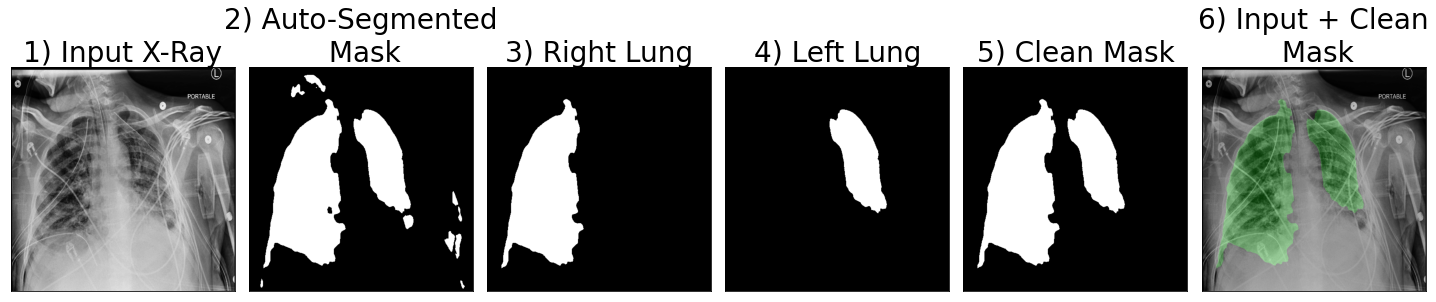

In [9]:
_id = 15


img = imread(image_df.png[_id])
img = Image.fromarray(img).convert("P")
img = torchvision.transforms.functional.resize(img, (512, 512))
mask = imread(image_df.png[_id].split(".png")[0]+"_mask.png")
mask_l = imread(image_df.mask_l[_id], as_gray=True)
mask_r = imread(image_df.mask_r[_id], as_gray=True)
mask_cleaned = imread(image_df.mask_cleaned[_id], as_gray=True)
mask_blend = (np.stack(( np.zeros((512,512)), mask_cleaned, np.zeros((512,512)) ), axis=2) * 255).astype(np.uint8).reshape(512,512,3)

fig, ax = plt.subplots(1,6, figsize=(20,6), sharex=True, sharey=True)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(mask, cmap="gray")
ax[2].imshow(mask_r, cmap="gray")
ax[3].imshow(mask_l, cmap="gray")
ax[4].imshow(mask_cleaned, cmap="gray")
ax[5].imshow(Image.blend(img.convert("RGB"), Image.fromarray(mask_blend), 0.2))

titles = ["Input X-Ray", "Auto-Segmented\n Mask", "Right Lung", "Left Lung", "Clean Mask", "Input + Clean\n Mask"]

for i, title in enumerate(titles):
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    ax[i].set_title(f"{i+1}) {title}", size=28)

fig.tight_layout()
fig.savefig("../thesis/figures/impl/input_mask_full_example2.png")

In [13]:
settings = {'binWidth': 25,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}

## works with example mask
#feats = rad.firstorder.RadiomicsFirstOrder(ray,
#                                        sitk.GetImageFromArray(np.transpose(npm, axes=[1,2,0])[:,:,32]),
#                                        **settings)

xray = imread(image_df.png[_id], as_gray=True)
xray = Image.fromarray(xray).convert("P")
xray = torchvision.transforms.functional.resize(xray, (512, 512))

_masks = []
_masks.append(imread(image_df.mask_l[_id], as_gray=True))
_masks.append(imread(image_df.mask_r[_id], as_gray=True))
_masks.append(imread(image_df.mask_cleaned[_id], as_gray=True))

_masks_name = ["Mask Left", "Mask Right", "Mask Cleaned"]

for mname, m in zip(_masks_name, _masks):
    ray = sitk.GetImageFromArray(xray) 
#roi = sitk.GetImageFromArray(mask[:,:,1]/255)
    roi = sitk.GetImageFromArray(m)

    print(image_df.png[_id], f"-- {mname}:")
    #feats = rad.firstorder.RadiomicsFirstOrder(ray, roi, **settings)
    feats = rad.shape2D.RadiomicsShape2D(ray, roi, **settings)
    res = feats.execute()
    resdf = pd.DataFrame(res.items()).set_index(0).T.iloc[:,:10]
    print(resdf)
    #for (key, val) in six.iteritems(res):
    #    print('  ', key, ':', val)

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A860070/01-24-1901-NA-CHEST AP PORT-64731/1.000000-AP-59363/1-1.png -- Mask Left:
0 Elongation MajorAxisLength     MaximumDiameter MeshSurface MinorAxisLength  \
1   0.346106      253.440379  251.44581921360316     16857.5       87.717288   

0          Perimeter PerimeterSurfaceRatio PixelSurface Sphericity  
1  641.3279938488596   0.03804407497249649      16858.0   0.717664  
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A860070/01-24-1901-NA-CHEST AP PORT-64731/1.000000-AP-59363/1-1.png -- Mask Right:
0 Elongation MajorAxisLength     MaximumDiameter MeshSurface MinorAxisLength  \
1   0.446735      370.132081  414.48401657965053     43354.5      165.351139   

0           Perimeter PerimeterSurfaceRatio PixelSurface Sphericity  
1  1193.4600282048132  0.027527938926866027      43355.0   0.618464  
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A860070/01-24-1901-NA-CHEST AP PORT-6

In [8]:
fpath = "data/thresh1_radiomics.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics.csv", index=False)


### Simple Death/Live classifier

In [9]:
targets = ["last.status", "is_icu", "was_ventilated"]
df = rad_df.merge(medical_df[targets + ["to_patient_id"]], left_on="id", right_on="to_patient_id").drop("to_patient_id", axis=1)
df[targets] = df[targets].replace({"discharged":0, "deceased":1, False:0, True:1, "No":0, "Yes":1})
df["y"] = df["last.status"]
df.drop(targets, axis=1, inplace=True)
print(df["y"].value_counts())
df

0    6462
1    2994
Name: y, dtype: int64


,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,id,left,y
0,71.0,150.0,394369086.0,2.394008,41.0,3.095117,218.0,24.855771,113.581023,116.0,...,200.0,17.243342,117.854397,-0.177483,394369086.0,0.225914,989.010033,A860070,True,0
1,39.0,142.0,256883687.0,2.665426,53.0,2.753274,237.0,30.943247,94.441930,97.0,...,232.0,22.282641,101.974930,0.012578,256883687.0,0.180553,1479.608082,A860070,False,0
2,55.0,149.0,296824858.0,2.539965,50.0,2.468845,194.0,28.485066,104.368473,107.0,...,182.0,20.807826,110.042579,-0.232445,296824858.0,0.193323,1216.591137,A860070,True,0
3,47.0,154.0,377337361.0,2.685669,65.0,2.055343,203.0,34.010481,99.428671,98.0,...,194.0,26.373653,107.190604,0.072664,377337361.0,0.166770,1603.764842,A860070,False,0
4,54.0,161.0,707815625.0,2.702847,57.0,2.444984,211.0,32.624710,111.785194,116.0,...,204.0,23.878772,118.634395,-0.295529,707815625.0,0.172340,1578.189940,A860070,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,46.0,153.0,433797673.0,2.706376,56.0,2.655091,223.0,32.850336,95.486176,91.0,...,210.0,23.797447,103.665859,0.455126,433797673.0,0.172652,1629.000441,A465769,False,0
9452,34.0,159.0,360601513.0,2.859115,68.0,2.200067,218.0,37.929218,94.038588,92.0,...,214.0,28.803257,104.304912,0.186244,360601513.0,0.149290,2036.258611,A467516,True,0
9453,42.0,168.0,445826920.0,2.894611,78.0,2.016661,229.0,40.021014,104.900924,106.0,...,222.0,31.389670,114.895959,0.034406,445826920.0,0.143049,2196.877546,A467516,False,0
9454,40.0,156.0,230638020.0,2.808856,65.0,2.288337,214.0,35.542224,95.910448,95.0,...,205.0,26.429504,105.039042,0.160103,230638020.0,0.155346,1834.386355,A530281,True,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import auc, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

def classify_single(df):
    metric_names = ["f1", "prec", "rec"]
    metrics = [f1_score, precision_score, recall_score]
    results_train = pd.DataFrame()
    results = pd.DataFrame()
    rnd_state = 42

    y = df["y"]
    X = df.drop(["y", "id"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd_state,
                                                    stratify=y
                                                    )

    clfs = [('rf', RandomForestClassifier(random_state=rnd_state)),
            ('lreg', LogisticRegression(random_state=rnd_state, max_iter=250)),
            ('svm', SVC()),
            ('MLP', MLPClassifier(solver="adam", learning_rate="adaptive",
                    random_state=rnd_state, max_iter=500))
            ]

    for i, c in enumerate(clfs):
        print(f"fitting {c}...")
        pipe = Pipeline([('scaler', StandardScaler()),
                            #('pca', PCA(n_components=0.95)),
                            c])

        pipe.fit(X_train, y_train)
        for m,n in zip(metrics, metric_names):
            results_train.at[pipe.steps[1][0], n] = m(y_train, pipe.predict(X_train))
        for m,n in zip(metrics, metric_names):
            results.at[pipe.steps[1][0], n] = m(y_test, pipe.predict(X_test))
        #f1 = f1_score(y_test, pipe.predict(X_test))
        #prec = precision_score(y_test, pipe.predict(X_test))
        #rec = recall_score(y_test, pipe.predict(X_test))

    return (results_train, results)

In [11]:
rt, r = classify_single(df)
print("Train:\n", rt)
print("Test:\n", r)

fitting ('rf', RandomForestClassifier(random_state=42))...
fitting ('lreg', LogisticRegression(max_iter=250, random_state=42))...
fitting ('svm', SVC())...
fitting ('MLP', MLPClassifier(learning_rate='adaptive', max_iter=500, random_state=42))...
Train:
             f1      prec       rec
rf    1.000000  1.000000  1.000000
lreg  0.192110  0.538462  0.116910
svm   0.207728  0.687793  0.122338
MLP   0.411054  0.661724  0.298121
Test:
             f1      prec       rec
rf    0.303241  0.494340  0.218698
lreg  0.181818  0.519685  0.110184
svm   0.167376  0.556604  0.098497
MLP   0.315909  0.494662  0.232053


### Simple Multi-label classifier

In [12]:
def prepare_multiclass(_rad_df):
    targets = ["last.status", "is_icu", "was_ventilated"]
    df = _rad_df.merge(medical_df[targets + ["to_patient_id"]], left_on="id", right_on="to_patient_id").drop("to_patient_id", axis=1)

    df[targets] = df[targets].replace({"discharged":0, "deceased":1, False:0, True:1, "No":0, "Yes":1})
    df_targets = df[targets]
    lbls = df_targets.astype(int)
    lbls["foo"] = lbls["last.status"].astype(str) + lbls["is_icu"].astype(str) + lbls["was_ventilated"].astype(str)
    le = LabelEncoder()
    y = le.fit_transform(lbls["foo"])
    print("Labels: ['last.status', 'is_icu', 'was_ventilated'], \n        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']")
    df["y"] = y
    print(df["y"].value_counts())
    df.drop(targets, axis=1, inplace=True)
    return df
df = prepare_multiclass(rad_df)
df

Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,id,left,y
0,71.0,150.0,394369086.0,2.394008,41.0,3.095117,218.0,24.855771,113.581023,116.0,...,200.0,17.243342,117.854397,-0.177483,394369086.0,0.225914,989.010033,A860070,True,3
1,39.0,142.0,256883687.0,2.665426,53.0,2.753274,237.0,30.943247,94.441930,97.0,...,232.0,22.282641,101.974930,0.012578,256883687.0,0.180553,1479.608082,A860070,False,3
2,55.0,149.0,296824858.0,2.539965,50.0,2.468845,194.0,28.485066,104.368473,107.0,...,182.0,20.807826,110.042579,-0.232445,296824858.0,0.193323,1216.591137,A860070,True,3
3,47.0,154.0,377337361.0,2.685669,65.0,2.055343,203.0,34.010481,99.428671,98.0,...,194.0,26.373653,107.190604,0.072664,377337361.0,0.166770,1603.764842,A860070,False,3
4,54.0,161.0,707815625.0,2.702847,57.0,2.444984,211.0,32.624710,111.785194,116.0,...,204.0,23.878772,118.634395,-0.295529,707815625.0,0.172340,1578.189940,A860070,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,46.0,153.0,433797673.0,2.706376,56.0,2.655091,223.0,32.850336,95.486176,91.0,...,210.0,23.797447,103.665859,0.455126,433797673.0,0.172652,1629.000441,A465769,False,0
9452,34.0,159.0,360601513.0,2.859115,68.0,2.200067,218.0,37.929218,94.038588,92.0,...,214.0,28.803257,104.304912,0.186244,360601513.0,0.149290,2036.258611,A467516,True,0
9453,42.0,168.0,445826920.0,2.894611,78.0,2.016661,229.0,40.021014,104.900924,106.0,...,222.0,31.389670,114.895959,0.034406,445826920.0,0.143049,2196.877546,A467516,False,0
9454,40.0,156.0,230638020.0,2.808856,65.0,2.288337,214.0,35.542224,95.910448,95.0,...,205.0,26.429504,105.039042,0.160103,230638020.0,0.155346,1834.386355,A530281,True,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, roc_curve, roc_auc_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def classify(df, solver="ovr"):
    y = df["y"]
    X = df.drop(["y", "id"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y
                                                    )

    rnd_state = 42
    clfs = [('rf', RandomForestClassifier(n_estimators=10, max_depth=5, random_state=rnd_state)),
            ('lreg', LogisticRegression(random_state=rnd_state, max_iter=250)),
            ('svm', SVC(probability=True)),
            ('MLP', MLPClassifier(solver="adam", learning_rate="adaptive",
                    random_state=rnd_state, max_iter=500))]

    fig, ax = plt.subplots(2, len(clfs), figsize=(20, 8))

    for i, c in enumerate(clfs):
        pipe = Pipeline([('scaler', StandardScaler()),
                            #('pca', PCA(n_components=0.95)),
                            c])

        pipe.fit(X_train, y_train)

        print(f"--- Results for: {c[0]}")
        print("Train ROC-AUC: ", round(
                    roc_auc_score(y_train, pipe.predict_proba(X_train), 
                        multi_class=solver, average="weighted"
                    ), 4))
        print("Test ROC-AUC: ", round(
                    roc_auc_score(y_test, pipe.predict_proba(X_test),
                        multi_class=solver, average="weighted"
                    ), 4))

        ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train, ax=ax[0, i])
        ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax=ax[1, i])
    fig.tight_layout()

--- Results for: rf
Train ROC-AUC:  0.706
Test ROC-AUC:  0.6499


/Users/ostritze/opt/anaconda3/envs/thesis-py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


--- Results for: lreg
Train ROC-AUC:  0.6729
Test ROC-AUC:  0.6552
--- Results for: svm
Train ROC-AUC:  0.7191
Test ROC-AUC:  0.6736
--- Results for: MLP
Train ROC-AUC:  0.744
Test ROC-AUC:  0.6784


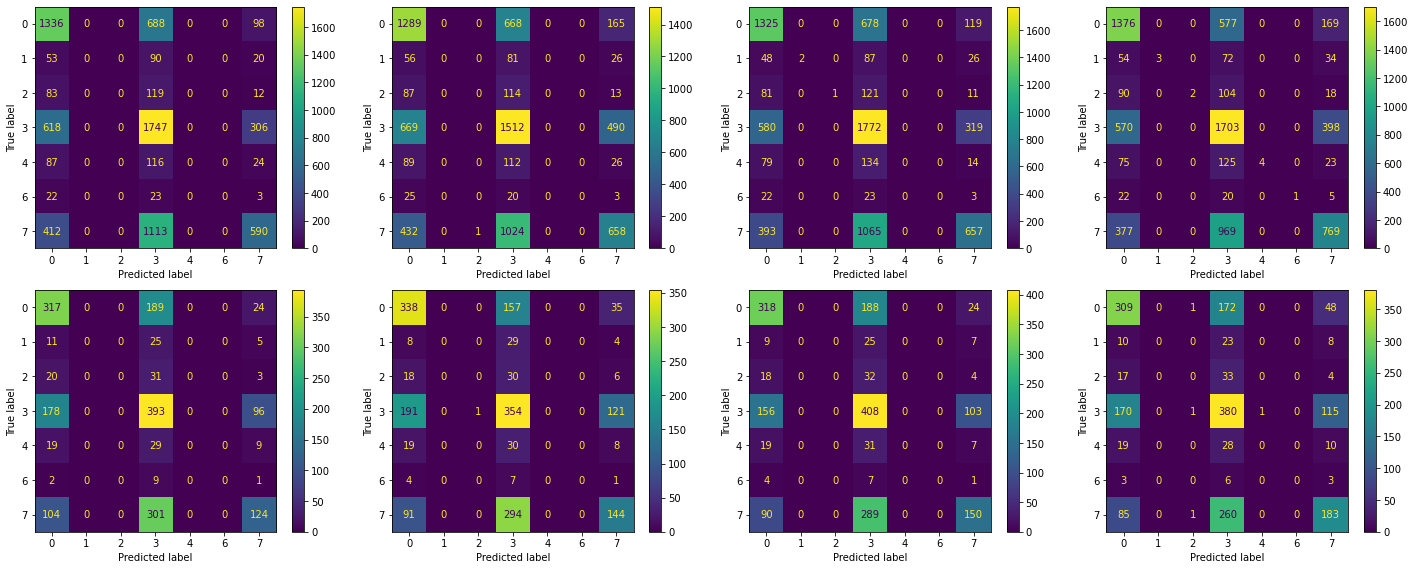

In [14]:
_df = df[df["y"] != 5]
classify(_df)

### Include 2D shape

In [15]:
from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D]

fpath = "data/thresh1_radiomics_2fc.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_2fc.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_2fc.csv", index=False)

df_2 = prepare_multiclass(rad_df)

Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


--- Results for: rf
Train ROC-AUC:  0.7149
Test ROC-AUC:  0.6573


/Users/ostritze/opt/anaconda3/envs/thesis-py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


--- Results for: lreg
Train ROC-AUC:  0.6972
Test ROC-AUC:  0.6793
--- Results for: svm
Train ROC-AUC:  0.7546
Test ROC-AUC:  0.6944
--- Results for: MLP
Train ROC-AUC:  0.7768
Test ROC-AUC:  0.7033


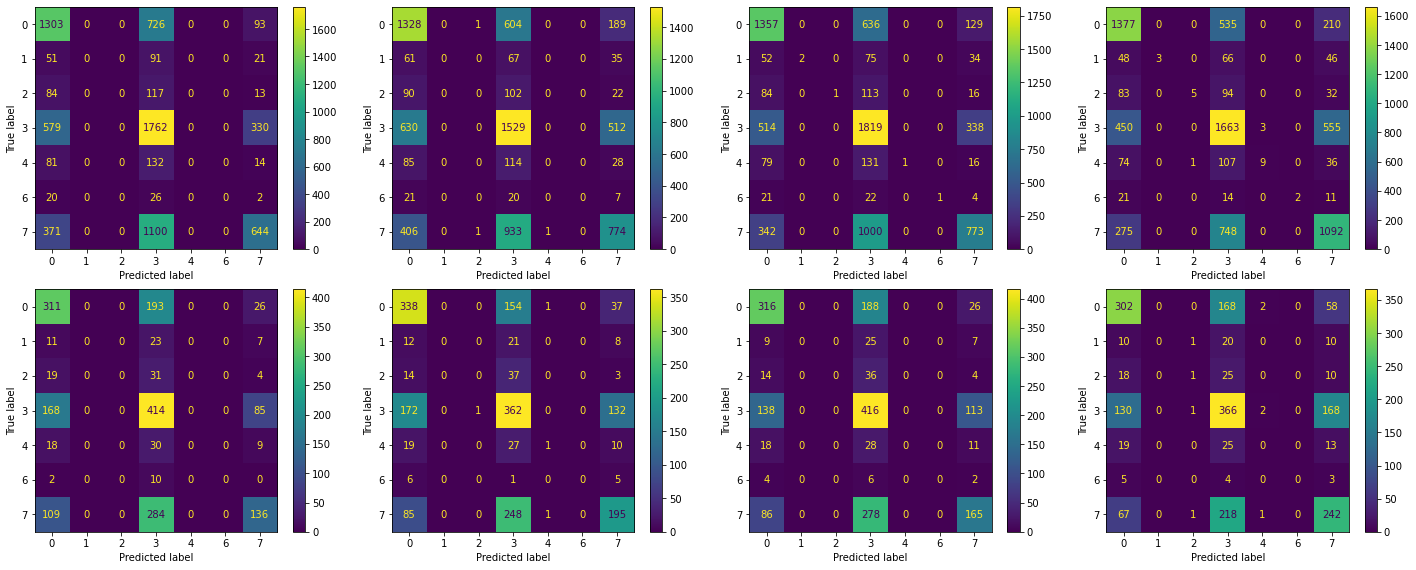

In [16]:
_df = df_2[df_2["y"] != 5]
classify(_df)

### Include GLCM

In [17]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM]

fpath = "data/thresh1_radiomics_3fc.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_3fc.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_3fc.csv", index=False)

df_3 = prepare_multiclass(rad_df)
rad.logger.setLevel(logging.WARN)



Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


--- Results for: rf
Train ROC-AUC:  0.7691
Test ROC-AUC:  0.7245


/Users/ostritze/opt/anaconda3/envs/thesis-py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


--- Results for: lreg
Train ROC-AUC:  0.7585
Test ROC-AUC:  0.742
--- Results for: svm
Train ROC-AUC:  0.8024
Test ROC-AUC:  0.7486
--- Results for: MLP
Train ROC-AUC:  0.8509
Test ROC-AUC:  0.7482


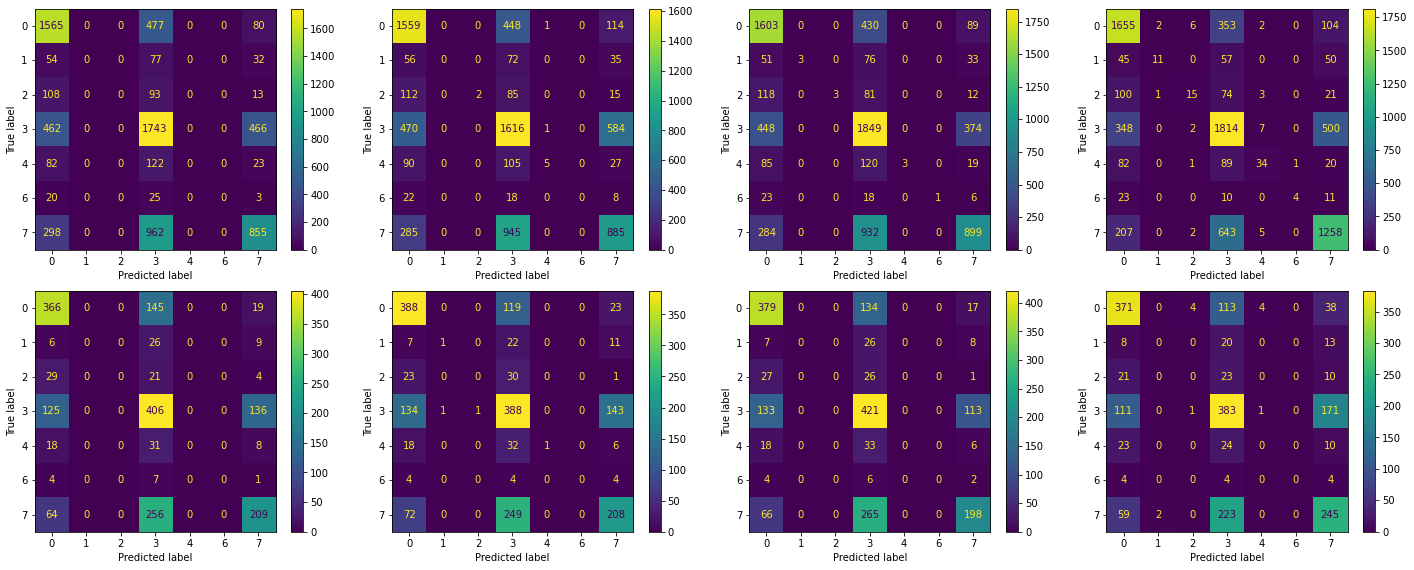

In [18]:
_df = df_3[df_3["y"] != 5]
classify(_df)

### Include GLZSM

In [19]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM, rad.glszm.RadiomicsGLSZM]

fpath = "data/thresh1_radiomics_4fc.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_4fc.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_4fc.csv", index=False)

df_4 = prepare_multiclass(rad_df)
rad.logger.setLevel(logging.WARN)

Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


--- Results for: rf
Train ROC-AUC:  0.774
Test ROC-AUC:  0.7307


/Users/ostritze/opt/anaconda3/envs/thesis-py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


--- Results for: lreg
Train ROC-AUC:  0.7739
Test ROC-AUC:  0.751
--- Results for: svm
Train ROC-AUC:  0.8192
Test ROC-AUC:  0.7613
--- Results for: MLP
Train ROC-AUC:  0.896
Test ROC-AUC:  0.744


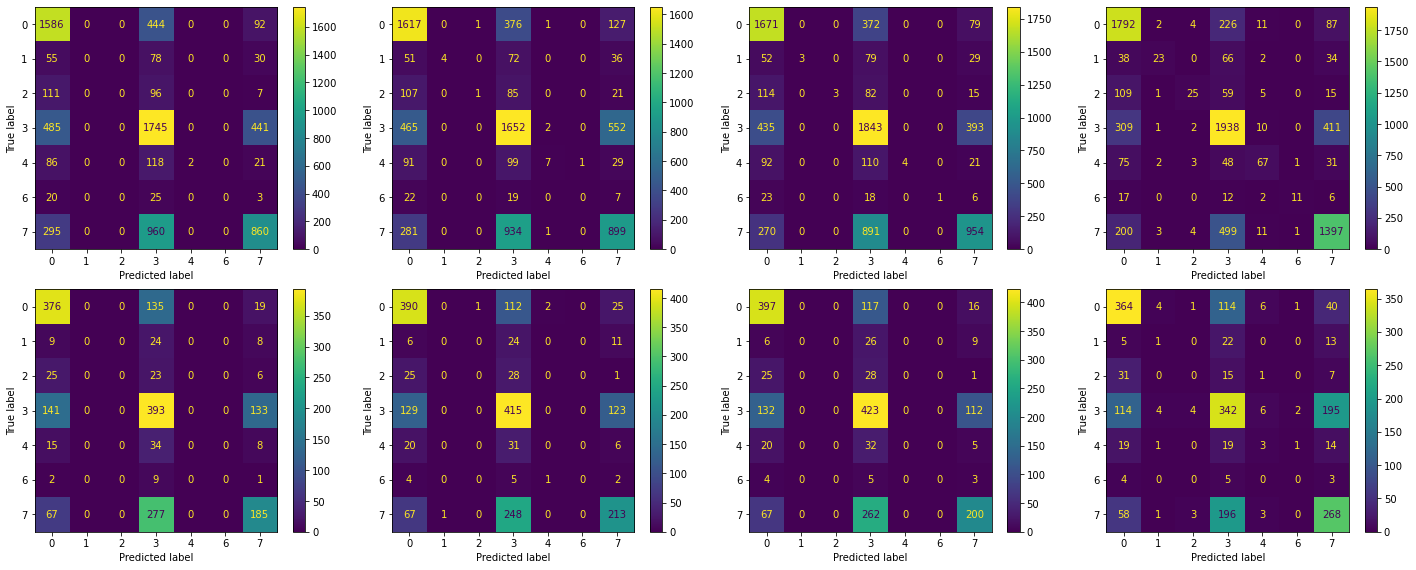

In [20]:
_df = df_4[df_4["y"] != 5]
classify(_df)

### Include GLRLM

In [34]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM, rad.glszm.RadiomicsGLSZM, rad.glrlm.RadiomicsGLRLM]

fpath = "data/thresh1_radiomics_5fc.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_5fc.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_5fc.csv", index=False)

df_5 = prepare_multiclass(rad_df)
rad.logger.setLevel(logging.WARN)

extracting radiomics features for 4728 records... This may take a while!


100%|██████████| 4728/4728 [44:17<00:00,  1.78it/s]  


Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


--- Results for: rf
Train ROC-AUC:  0.7733
Test ROC-AUC:  0.7242


/Users/ostritze/opt/anaconda3/envs/thesis-py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


--- Results for: lreg
Train ROC-AUC:  0.7803
Test ROC-AUC:  0.7535
--- Results for: svm
Train ROC-AUC:  0.8188
Test ROC-AUC:  0.7619
--- Results for: MLP
Train ROC-AUC:  0.8914
Test ROC-AUC:  0.7504


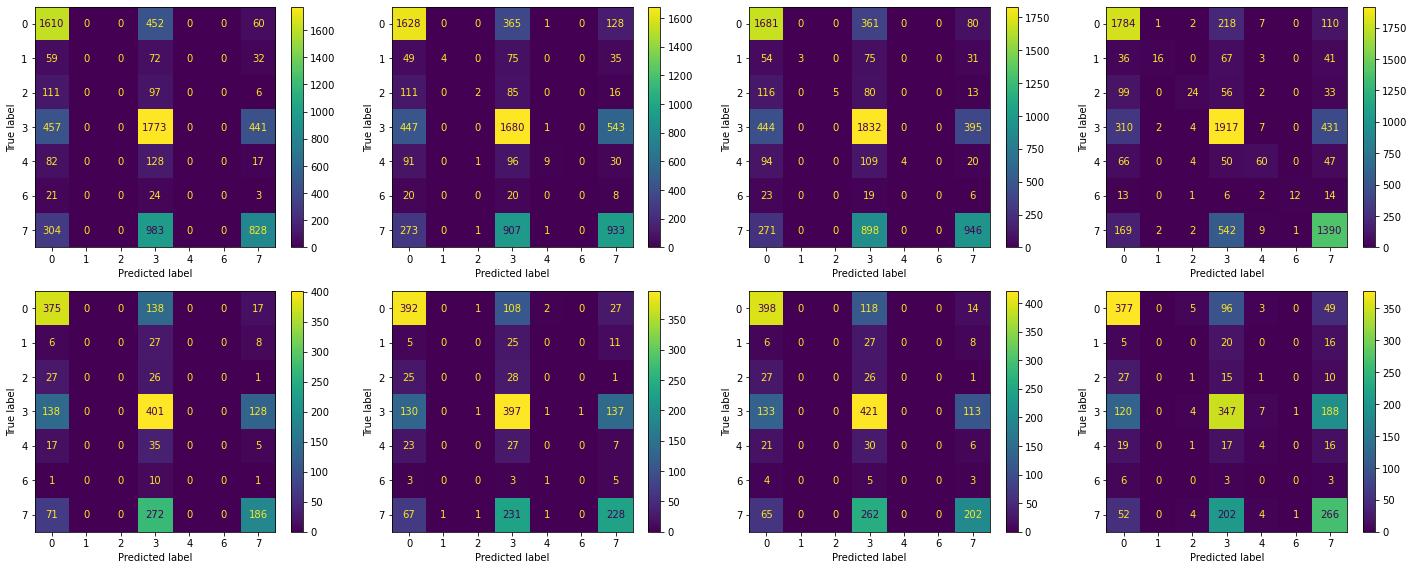

In [22]:
_df = df_5[df_5["y"] != 5]
classify(_df)

In [23]:
print(_df.shape)
_df.head(5)


(9450, 86)


,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,RunLengthNonUniformity,RunLengthNonUniformityNormalized,RunPercentage,RunVariance,ShortRunEmphasis,ShortRunHighGrayLevelEmphasis,ShortRunLowGrayLevelEmphasis,id,left,y
0,71.0,150.0,394369086.0,2.394008,41.0,3.095117,218.0,24.855771,113.581023,116.0,...,2190.017636,0.225900,0.336932,8.502460,0.465718,13.141930,0.024670,A860070,True,3
1,39.0,142.0,256883687.0,2.665426,53.0,2.753274,237.0,30.943247,94.441930,97.0,...,2154.224466,0.239137,0.360260,6.314082,0.482460,11.159551,0.045927,A860070,False,3
2,55.0,149.0,296824858.0,2.539965,50.0,2.468845,194.0,28.485066,104.368473,107.0,...,1657.048577,0.210120,0.316733,9.323251,0.445537,11.217283,0.029789,A860070,True,3
3,47.0,154.0,377337361.0,2.685669,65.0,2.055343,203.0,34.010481,99.428671,98.0,...,3014.841617,0.251759,0.358622,7.613894,0.499589,12.210659,0.038961,A860070,False,3
4,54.0,161.0,707815625.0,2.702847,57.0,2.444984,211.0,32.624710,111.785194,116.0,...,4088.209235,0.231839,0.347431,7.370428,0.473630,13.271928,0.033135,A860070,True,3


In [41]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM, rad.glszm.RadiomicsGLSZM, rad.glrlm.RadiomicsGLRLM,
 rad.ngtdm.RadiomicsNGTDM, rad.gldm.RadiomicsGLDM]

fpath = "data/thresh1_radiomics_all.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_all.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_all.csv", index=False)

print(rad_df.shape)
rad.logger.setLevel(logging.WARN)
#df_6 = prepare_multiclass(rad_df)

extracting radiomics features for 4728 records... This may take a while!


100%|██████████| 4728/4728 [59:03<00:00,  1.33it/s]  


(9456, 105)


### Stack features

In [34]:
fpath = "data/thresh1_radiomics_all.csv"

rad_df = pd.read_csv(fpath)

rad_left = rad_df[rad_df["left"] == True]
rad_right = rad_df[rad_df["left"] == False]
print(rad_left.shape, rad_right.shape)

m = rad_left.merge(rad_right, on="xray_path", suffixes=("_l", "_r"))
print(m.shape)
print(rad_left.columns[-4:])
m = m.drop(["left_r", "left_l", "id_l"], axis=1)
m.rename(columns={"id_r": "id"}, inplace=True)
m.head()
m.to_csv("data/thresh1_radiomics_all_stacked.csv", index=False)

(4728, 105) (4728, 105)
(4728, 209)
Index(['SmallDependenceLowGrayLevelEmphasis', 'id', 'xray_path', 'left'], dtype='object')


## Extract combined masks

Since we did not have that good of a run for the separated masks, they differed a lot in results, we also provide a FE for the combined masks to be able to compare this then in the end...

In [37]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM, rad.glszm.RadiomicsGLSZM, rad.glrlm.RadiomicsGLRLM]

fpath = "data/thresh1_radiomics_5fc_combined.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_5fc_combined.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings, combined_rois=True,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_5fc_combined.csv", index=False)

rad.logger.setLevel(logging.WARN)
df_6 = prepare_multiclass(rad_df)

extracting radiomics features for 4728 records... This may take a while!


100%|██████████| 4728/4728 [20:45<00:00,  3.80it/s]


NameError: name 'prepare_multiclass' is not defined

In [40]:
settings = {'binWidth': 25,
            #'force2D' : True,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}
import logging
rad.logger.setLevel(logging.ERROR)

from data.lungdataset import LungData

featureClasses = [rad.firstorder.RadiomicsFirstOrder, rad.shape2D.RadiomicsShape2D,
 rad.glcm.RadiomicsGLCM, rad.glszm.RadiomicsGLSZM, rad.glrlm.RadiomicsGLRLM,
 rad.ngtdm.RadiomicsNGTDM, rad.gldm.RadiomicsGLDM]

fpath = "data/thresh1_radiomics_all_combined.csv"
if os.path.isfile(fpath):
    rad_df = pd.read_csv("data/thresh1_radiomics_all_combined.csv")
else:
    rad_df = LungData.extract_radiomics_features(ld, image_df=image_df, settings=settings, combined_rois=True,
        featureClasses=featureClasses,
        #limit=10
        )
    rad_df.to_csv("data/thresh1_radiomics_all_combined.csv", index=False)

print(rad_df.shape)
rad.logger.setLevel(logging.WARN)
df_6 = prepare_multiclass(rad_df)

extracting radiomics features for 4728 records... This may take a while!


100%|██████████| 4728/4728 [36:44<00:00,  2.14it/s]


(4728, 105)


NameError: name 'prepare_multiclass' is not defined

## Feature Exploration

In [120]:
rdf = pd.read_csv("data/thresh1_radiomics_5fc.csv")
rdf = prepare_multiclass(rdf)
rdf.head(5)

Labels: ['last.status', 'is_icu', 'was_ventilated'], 
        [0:'000' 1:'001' 2:'010' 3:'011' 4:'100' 5:'101' 6:'110' 7:'111']
3    3338
0    2652
7    2644
4     284
2     268
1     204
6      60
5       6
Name: y, dtype: int64


,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,RunLengthNonUniformity,RunLengthNonUniformityNormalized,RunPercentage,RunVariance,ShortRunEmphasis,ShortRunHighGrayLevelEmphasis,ShortRunLowGrayLevelEmphasis,id,left,y
0,71.0,150.0,394369086.0,2.394008,41.0,3.095117,218.0,24.855771,113.581023,116.0,...,2190.017636,0.225900,0.336932,8.502460,0.465718,13.141930,0.024670,A860070,True,3
1,39.0,142.0,256883687.0,2.665426,53.0,2.753274,237.0,30.943247,94.441930,97.0,...,2154.224466,0.239137,0.360260,6.314082,0.482460,11.159551,0.045927,A860070,False,3
2,55.0,149.0,296824858.0,2.539965,50.0,2.468845,194.0,28.485066,104.368473,107.0,...,1657.048577,0.210120,0.316733,9.323251,0.445537,11.217283,0.029789,A860070,True,3
3,47.0,154.0,377337361.0,2.685669,65.0,2.055343,203.0,34.010481,99.428671,98.0,...,3014.841617,0.251759,0.358622,7.613894,0.499589,12.210659,0.038961,A860070,False,3
4,54.0,161.0,707815625.0,2.702847,57.0,2.444984,211.0,32.624710,111.785194,116.0,...,4088.209235,0.231839,0.347431,7.370428,0.473630,13.271928,0.033135,A860070,True,3


In [122]:
scaler = StandardScaler()
rdfs = scaler.fit_transform(rdf.drop(["left", "id", "y"], axis=1))
rdfs = pd.DataFrame(rdfs, columns = rdf.columns[:-3])
rdfs["left"] = rdf["left"].astype(int)
rdfs.head(5)

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,LowGrayLevelRunEmphasis,RunEntropy,RunLengthNonUniformity,RunLengthNonUniformityNormalized,RunPercentage,RunVariance,ShortRunEmphasis,ShortRunHighGrayLevelEmphasis,ShortRunLowGrayLevelEmphasis,left
0,1.342335,-0.525578,0.044532,-1.108299,-1.663184,1.872862,0.179947,-1.542257,0.712149,0.749546,...,-0.807689,-0.786979,-0.121224,0.064743,0.127950,-0.263273,0.112035,0.572677,-0.755046,1
1,-0.782285,-1.115782,-0.828807,-0.022151,-0.611792,0.931160,1.298944,-0.403312,-0.742193,-0.459216,...,0.275828,-0.412916,-0.161042,0.490925,0.661475,-0.667663,0.548376,-0.234321,0.318370,0
2,0.280025,-0.599353,-0.575092,-0.524215,-0.874640,0.147620,-1.233522,-0.863229,0.012106,0.176974,...,-0.442044,-0.177090,-0.714134,-0.443297,-0.334009,-0.111598,-0.413959,-0.210819,-0.496541,1
3,-0.251130,-0.230476,-0.063657,0.058856,0.439600,-0.991488,-0.703471,0.170557,-0.363260,-0.395597,...,-0.165752,-0.541555,0.796365,0.897278,0.624012,-0.427471,0.994829,0.193570,-0.033383,0
4,0.213630,0.285953,2.035617,0.127597,-0.261328,0.081887,-0.232315,-0.088716,0.575688,0.749546,...,-0.399686,-0.097929,1.990449,0.255952,0.368074,-0.472461,0.318227,0.625597,-0.327602,1


<AxesSubplot:>

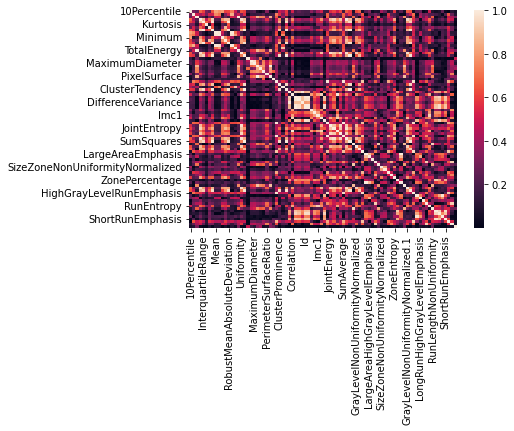

In [127]:
sns.heatmap(rdfs.corr().abs())

In [134]:
# Create correlation matrix
corr_matrix = rdfs.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
rdfs_cleaned = rdfs.drop(to_drop, axis=1)
print(to_drop)

['MeanAbsoluteDeviation', 'Median', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'TotalEnergy', 'Uniformity', 'Variance', 'MaximumDiameter', 'PixelSurface', 'ClusterProminence', 'ClusterTendency', 'DifferenceEntropy', 'DifferenceVariance', 'Id', 'Idm', 'InverseVariance', 'JointAverage', 'JointEnergy', 'MCC', 'SumAverage', 'SumEntropy', 'SumSquares', 'ZoneVariance', 'GrayLevelNonUniformityNormalized.1', 'GrayLevelVariance.1', 'HighGrayLevelRunEmphasis', 'RunPercentage', 'RunVariance', 'ShortRunEmphasis']


<AxesSubplot:>

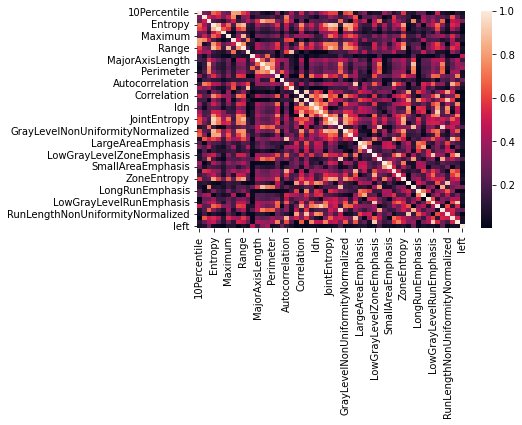

In [132]:
sns.heatmap(rdfs_cleaned.corr().abs())

## Undersampling